# Nonlinear Response of a Morse Oscillator #

\[This file should be viewed with app mode turned **off**.\]

In our last exercise, we calculated the absorption spectrum for a collection of harmonic oscillators using the *linear response* relation ${\bf P}(\omega) = \chi^{(1)}(\omega) {\bf E}(\omega)$. This week we'll take a look at the *nonlinear response* of a different kind of oscillator: the anharmonic *Morse oscillator*. 

The Morse potential has the form
\begin{align}
V(x) = D_e \left( 1 - e^{-\alpha x} \right)^2
\end{align}
and often usually used as a model for anharmonic vibrations. The term "anharmonic" means exactly what it sounds like: "not harmonic". Although *linear* vibrational spectra can usually be understood in terms of the oscillation of strictly *harmonic* bonds (like we considered last week), *nonlinear* spectra must be understood in terms of anharmonic effects because, as we'll see today, nonlinear signals vanish identically for harmonic oscillators. 

In most physical applications, the coordinate $x$ in the Morse potential represents the *deviation of a bond length* away from its equilibrium value. In our last simulation, we explicitly modeled all (two-dimensional) degrees of freedom of our oscillators. For practical purposes, however, this is overkill. We saw last time that when we allowed our sample to interact with a laser pulse resonant with the bond vibrational frequency, the motion induced in the sample consisted almost entirely of bond stretching and compression. Rotational motion, for example, was almost absent since the pulse was not resonant with the rotational timescale of the molecules. For this reason, it is usually sufficient to consider a *reduced description* of our system of interest where we explicitly model only a few degrees of freedom. In this case, the degrees of freedom we model will be vibrational motion for a diatomic molecule with a Morse potential joining the two atims. 

In contrast to the harmonic potential, the Morse potential has two parameters, which determine both the oscillation frequency and the *anharmonicity* of the bond. The *anharmonicity* of the potential is determined by the dissociation energy $D_e$. This parameter specifies the energy needed to break the bond entirely, allowing the two atoms to fly away from each other. In our simulation, we'll keep the particle energy much smaller than $D_e$ so that our bond stays inteact. Nonetheless, even at these energies, anharmonic effects will be apparent in the simulation. 

A key characteristic of anharmonic models is that the *oscillation frequency is a function of the energy* of the system. For very small energies, when the coordinate $x$ stays close to zero, the Morse potential can be expanded to first order in a Taylor series to give 
\begin{align}
V(x) \approx D_e \alpha^2 x^2 \equiv \frac{k_o x^2}{2} .
\end{align}
Here $k_o$ is the harmonic force constant for the bond. When the amplitude of the motion is very small so that the first-order Taylor expansion is valid, motion in a Morse potential looks essentially harmonic with an oscillation frequency of $\omega_o = \sqrt{\frac{k_o}{M}}$, with $M$ the oscillator (reduced) mass. Thus the Morse parameter $\alpha$ can be related to the harmonic frequency $\omega_o$ by the formula
\begin{align}
  \alpha = \sqrt{\frac{k_o}{2 D_e}} .
\end{align}

The code below implements and plots an MD simulation for a single Morse oscillator. The figure on the left plots the position of the particle relative on the Morse potential energy surface as a function of time. The right panel plots the electric field and the induced dipole moment. (The oscillator is assumed to consist of two atoms with charges +Qo and -Qo. We're "pretending" here that the equilibrium bond length is exactly 0. This is obviously not physically correct, but it turns out to have no impact on the spectroscopy.) 

Take a look through the code, run the simulation, and then think about the questions posted below it. You'll submit your answers with your homework.

In [ ]:

import math
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
import time
import numpy as np

def calc_accel(x,efield):
    ax = - 2.0*De*alpha*(np.exp(-alpha*x) - np.exp(-2.0*alpha*x))/M
    ax += Qo*efield/M
    #ax = -K*x/M
    return ax

def vv_step(x,vx,ax,efield):
    axrand = math.sqrt(2.0*kB*Temp*gamma/dt)*np.random.normal(0,1,1)/M
    xnew = x + B*dt*vx + 0.5*B*dt*dt*(ax + axrand)
    axnew = calc_accel(xnew,efield)
    vxnew = A*vx + 0.5*dt*(A*ax + axnew + 2.0*B*axrand)
    return xnew,vxnew,axnew

def gauss_pulse(t):
    return Emax*np.cos(2.0*math.pi*(t-to)*nu)*np.exp(-((t-to)**2)/(2.0*sigma*sigma))

def morse_energy(X):
    return De*(1.0 - np.exp(-alpha*X))**2

def plot_potential(X):
    xaxis = np.arange(-1,1,0.001)*xtherm*300
    fig = plt.figure()
    plt.plot(xaxis, De*(1.0 - np.exp(-np.sqrt(M*wo**2/(2.0*De))*xaxis))**2)
    partPt, = plt.plot(X,morse_energy(X), 'o')
    
    ax2 = plt.axes([1.0,0.575,1.0,0.3])
    plt.xlabel('$t$')
    plt.ylabel('$E(t)$')
    fieldPts, = plt.plot(taxis[0],Efield[0])
    muPts, = plt.plot(taxis[0],0)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([-1,1])
    plt.xlim([0,dt*Nsteps])
    
    return fig,partPt,fieldPts,muPts

def update_plot():
    partPt.set_xdata(X)
    partPt.set_ydata(morse_energy(X))
    
    fieldPts.set_xdata(taxis[0:n])
    fieldPts.set_ydata(Efield[0:n]/Emax)
    
    muPts.set_xdata(taxis[0:n])
    muPts.set_ydata(Mu[0:n]/(100.0*xtherm*Qo*(Emax/250e+4)))
    
    display.display(plt.gcf())
    display.clear_output(wait=True)

to = 150e-15
sigma = 50e-15
nu = 50e+12

tmax=0.4e-12      # Total simulation time in seconds
dt=1e-15     # Time-step in seconds
Nsteps=int(tmax/dt)
M=12*(1.66054e-24)   # Mass in g
Qo = 4.803e-10         # Elementary charge in statCoulombs
taxis = np.arange(0,Nsteps)*dt   # Time axis (array of time steps)

gamma = 0.0e-12  # grams/second
kB = 1.38064852e-16                  # erg/K
Temp = 300                           # K
B = 1.0/(1.0 + 0.5*gamma*dt/M)
A = B*(1.0 - 0.5*gamma*dt/M)

wo = 6.28*50e12        # Oscillator (angular) frequency
W = wo
K = M*W**2

De = 1e+5*(kB*300.0)
alpha = np.sqrt(K/(2.0*De))
xtherm = np.sqrt(kB*Temp/(M*W**2))

Emax = 300e+4   # Maximum electric field in statV/cm
Efield = gauss_pulse(taxis)

# Boltzman distribution for X is _approximately_ normal with form exp(-M*(W**2)*(X**2)/2)
X = 0

# Boltzman distribution for VX is _approximately_ normal with form exp(-M*(W**2)*(X**2)/2)
VX = 0
AX = calc_accel(X,Efield[0])

Mu = np.zeros((Nsteps))
fig,partPt,fieldPts,muPts = plot_potential(X)
for n in range(0,Nsteps):
    X,VX,AX = vv_step(X,VX,AX,Efield[n])
    Mu[n] = X*Qo
    if(n%1==0):
        update_plot()

## Homework Questions

1. Play a bit with the value of the parameter $D_e$ in the simulation above. How does changing $D_e$ change the frequency of the oscillation? How does it change the shape of the potential? In what limit does the Morse potential converge to a harmonic potential? 


*Insert your answer here*

2. Look carefully at the oscillator's motion. At high excitation energies (e.g., with a maximum electric field of $10^7$ statV/cm), does the particle travel farther to the right or the left of $x = 0$? How does this relate to the curvature of the potential? Does the motion more resemble harmonic motion when the amplitude is large or small? 

*Insert your answer here.*

## Nonlinear Response ##

Now that we've learned a bit about the Morse oscillator itself, let's investigate its *nonlinear* response properties. Recall that in the *linear response regime* the total polarization of a system is governed by the relation
\begin{align}
{\bf P}(\omega) = \chi(\omega) {\bf E}(\omega) .
\end{align}
In this case, if we double the amplitude of the *field*, making the replacement ${\bf E}(\omega) \to 2 {\bf E}(\omega)$, then the amplitude of the *polarization* should also double sending ${\bf P}(\omega) \to 2 {\bf P}(\omega)$. Harmonic systems (like the ones we studied last week) *always* respond linearly to the electric field. 

Anharmonic systems like the Morse oscillator, however, don't necessarily follow this relation. When we double the amplitude of the field, the polarization of the system can change in unexpected ways. In the next simulation, we'll check out just what properties change *nonlinearly* when a Morse oscillator interacts with the electromagnetic field. 

The code below is identical to the one above except that it presents data for *two* Morse oscillators with positions ``X1`` and ``X2``, respectively. The only difference between the two oscillators is that the second oscillator (``X2``) is excited by an electric field with *twice the amplitude* of the first oscillator (``X1``). 

After looking over the code, run the simulation and try to understand what's different about the response of the two oscillators. Note that the plot on the lower right shows the *difference* 
\begin{align}
\mu^{(\text{NL})}(t) = 2 \mu^{(1)}(t) - \mu^{(2)}(t)
\end{align}
between the *scaled* response of the first oscillator $2 \mu^{(1)}(t)$ and the response of the second oscillator $\mu^{(2)}(t)$. If the system were responding *linearly* to the field, this difference would be exactly zero. Thus the signal $\mu^{(\text{NL})}$ calculated in this way can be taken as proxy for the *nonlinear response* of the system. 

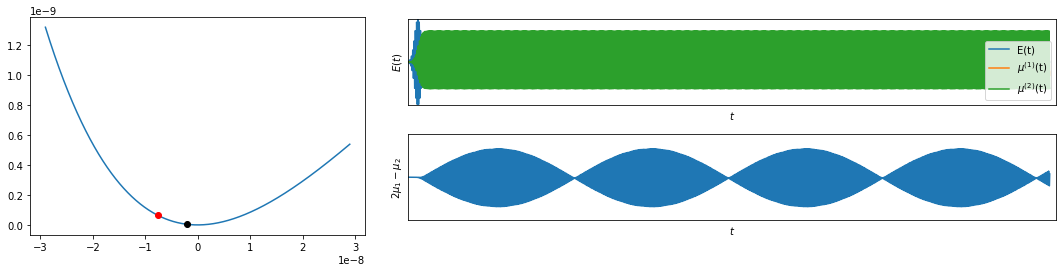

In [2]:
import math
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
import time
import numpy as np

def calc_accel(x,efield):
    ax = - 2.0*De*alpha*(np.exp(-alpha*x) - np.exp(-2.0*alpha*x))/M
    ax += Qo*efield/M
    #ax = -K*x/M
    return ax

def vv_step(x,vx,ax,efield):
    axrand = math.sqrt(2.0*kB*Temp*gamma/dt)*np.random.normal(0,1,1)/M
    xnew = x + B*dt*vx + 0.5*B*dt*dt*(ax + axrand)
    axnew = calc_accel(xnew,efield)
    vxnew = A*vx + 0.5*dt*(A*ax + axnew + 2.0*B*axrand)
    return xnew,vxnew,axnew

def gauss_pulse(t):
    return Emax*np.cos(2.0*math.pi*(t-to)*nu)*np.exp(-((t-to)**2)/(2.0*sigma*sigma))

def morse_energy(X):
    return De*(1.0 - np.exp(-alpha*X))**2

def plot_potential(X1,X2):
    xaxis = np.arange(-1,1,0.001)*xtherm*200
    fig = plt.figure()
    plt.plot(xaxis, De*(1.0 - np.exp(-np.sqrt(M*wo**2/(2.0*De))*xaxis))**2)
    
    partPt1, = plt.plot(X1,morse_energy(X1), 'ko')
    partPt2, = plt.plot(X2,morse_energy(X1), 'ro')
    
    ax2 = plt.axes([1.0,0.575,1.5,0.3])
    plt.xlabel('$t$')
    plt.ylabel('$E(t)$')
    fieldPts, = plt.plot(taxis[0],Efield[0])
    muPts1, = plt.plot(taxis[0],0)
    muPts2, = plt.plot(taxis[0],0)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([-1,1])
    plt.xlim([0,dt*Nsteps])
    
    plt.legend(['E(t)', '$\mu^{(1)}$(t)', '$\mu^{(2)}$(t)'])
    
    ax3 = plt.axes([1.0,0.175,1.5,0.3])
    plt.xlabel('$t$')
    plt.ylabel('$2\mu_1 - \mu_2$')
    #fieldPts, = plt.plot(taxis[0],Efield[0])
    dmuPts, = plt.plot(taxis[0],0)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([-1,1])
    plt.xlim([0,dt*Nsteps])
    
    
    return fig,partPt1,partPt2,fieldPts,muPts1,muPts2,dmuPts

def update_plot():
    partPt1.set_xdata(X1)
    partPt1.set_ydata(morse_energy(X1))
    
    partPt2.set_xdata(X2)
    partPt2.set_ydata(morse_energy(X2))
    
    fieldPts.set_xdata(taxis[0:n])
    fieldPts.set_ydata(Efield[0:n]/Emax)
    
    muPts1.set_xdata(taxis[0:n])
    muPts1.set_ydata(Mu1[0:n]/(100.0*xtherm*Qo*(Emax/100e+4)))
    
    muPts2.set_xdata(taxis[0:n])
    muPts2.set_ydata(Mu2[0:n]/(100.0*xtherm*Qo*(Emax/100e+4)))
    
    dmuPts.set_xdata(taxis[0:n])
    dmuPts.set_ydata((2.0*Mu1[0:n]-Mu2[0:n])/(200.0*xtherm*Qo*(Emax/100e+4)))
    
    display.display(plt.gcf())
    display.clear_output(wait=True)

to = 150e-15
sigma = 50e-15
nu = 50e+12

tmax=10.0e-12      # Total simulation time in seconds
dt=1e-15     # Time-step in seconds
Nsteps=int(tmax/dt)
M=12*(1.66054e-24)   # Mass in g
Qo = 4.803e-10         # Elementary charge in statCoulombs
taxis = np.arange(0,Nsteps)*dt   # Time axis (array of time steps)

gamma = 0.0e-12  # grams/second
kB = 1.38064852e-16                  # erg/K
Temp = 0.0                           # K
B = 1.0/(1.0 + 0.5*gamma*dt/M)
A = B*(1.0 - 0.5*gamma*dt/M)

wo = 6.28*50e12        # Oscillator (angular) frequency
W = wo
K = M*W**2

De = 300.0*kB*100000
alpha = np.sqrt(K/(2.0*De))
xtherm = np.sqrt(kB*300.0/(M*wo**2))

Emax = 1e+6   # Maximum electric field in statV/cm
Efield = gauss_pulse(taxis)

# Boltzman distribution for X is _approximately_ normal with form exp(-M*(W**2)*(X**2)/2)
X1 = 0
X2 = 0

# Boltzman distribution for VX is _approximately_ normal with form exp(-M*(W**2)*(X**2)/2)
VX1 = 0
VX2 = 0

AX1 = calc_accel(X1,Efield[0])
AX2 = calc_accel(X1,2.0*Efield[0])

Mu1 = np.zeros((Nsteps))
Mu2 = np.zeros((Nsteps))
fig,partPt1,partPt2,fieldPts,muPts1,muPts2,dmuPts = plot_potential(X1,X2)
for n in range(0,Nsteps):
    X1,VX1,AX1 = vv_step(X1,VX1,AX1,Efield[n])
    X2,VX2,AX2 = vv_step(X2,VX2,AX2,2.0*Efield[n])
    Mu1[n] = np.sum(X1)*Qo
    Mu2[n] = np.sum(X2)*Qo
    if(n%99==0):
        update_plot()
    


## Pump-Probe Spectroscopy ##

Finally, once you've explored the simulation parameters a bit, let's use the simulation to calculate a spectroscopic signal. Specifically, we'll calculate the *difference* in absorption spectra for the oscillators excited with the two different laser fields, calculated using our linear response formula 
\begin{align}
A(\omega) \propto \text{Im }\frac{\breve{\bf P}^{(1)}(\omega)}{\breve{\bf E}(\omega)} .
\end{align}
Note that this formula is strictly valid *only* for systems responding linearly to the field. If our system really did respond linearly, the difference in absorption spectra for the two experiments would be exactly zero. The fact that (as we'll see shortly) we get a *nonzero difference* is evidence of the fact that our system is responding nonlinearly to the field. 

The difference in absorption spectra we calculate here is closely related to a zero time-delay *pump probe* measurement. Pump-probe spectroscopy is a nonlinear measurement in which two different laser beams -- the "pump" and the "probe" are passed through a sample. Essentially, the pump-probe experiment measures the absorption spectrum of the sample using the second ("probe") pulse at a fixed time delay after excitation by the first ("pump") pulse. The pump-probe signal is usually reported as a change in optical density ($\Delta$OD) corresponding to the absorption spectrum difference between "pump on" and "pump off" conditions. Our simulated experiment corresponds closely to a pump-probe spectrum with the time delay between pump and probe set to zero. 

To calculate the pump-probe spectrum, run the code **above** with 
* ``tmax`` (the simulation length) set to 10 ps
* ``gamma`` (the damping coefficient $\gamma$) set to 50 pg/s 
* ``Emax`` (the maximum amplitude of the electric field) set to 1e+6 statV/cm
These parameters will ensure both good frequency resolution and that the signal decays to zero within the simulation window. You may also want to change the sampling frequency to a larger number (e.g., change the final ``for`` loop to read ``if(n%100==0)``) to make the code run faster. 

Once the simulation finishes, run the code **below** to calculate the pump-probe spectrum. (Take a look through the code to make sure you understand how it works.) 

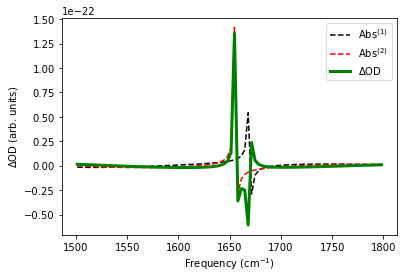

In [3]:
fMu1 = np.fft.fft(Mu1)
fMu2 = np.fft.fft(Mu2)
fE = np.fft.fft(Efield)

c = 2.9979e+10
vaxis = np.fft.fftfreq(Nsteps)/(dt*c)

v1 = 1500
v2 = 1800

ndx1 = np.where(np.abs(vaxis-v1)==np.min(np.abs(vaxis-v1)))[0][0]
ndx2 = np.where(np.abs(vaxis-v2)==np.min(np.abs(vaxis-v2)))[0][0]

Abs1 = -np.imag(fMu1[ndx1:ndx2]/fE[ndx1:ndx2])
Abs2 = -np.imag(fMu2[ndx1:ndx2]/(2.0*fE[ndx1:ndx2]))

plt.plot(vaxis[ndx1:ndx2], Abs1, 'k--')
plt.plot(vaxis[ndx1:ndx2], Abs2, 'r--')
plt.plot(vaxis[ndx1:ndx2], Abs2 - Abs1, 'g', linewidth=3)
plt.legend(['Abs$^{(1)}$', 'Abs$^{(2)}$', '$\Delta$OD'])
plt.xlabel('Frequency (cm$^{-1}$)')
plt.ylabel('$\Delta$OD (arb. units)')
plt.show()

## Homework Questions 

3. Why does the Morse oscillator produce a nonlinear signal? I.e., what features of the oscillator's motion change with increasing field intensity, and how are those changes reflected in the calculated absorption spectra? 

*Insert your answer here*


4. Run the simulation again with the friction turned off, i.e., $\gamma = 0$ pg/s. What happens to the shape of the nonlinear polarization ($2\mu_1 - \mu_2$) time trace? Why does it have this shape? (Note that your $\Delta$OD spectrum looks a little strange in this case because the signal is still non-zero at the boundaries of the observation time window, which produces "ringing" in the Fourier transform.)


*Insert your answer here*


5. We learned in class that nonlinear signals must satisfy a frequency-sum condition $$\omega = \omega_1 + \omega_2 + ... + \omega_N$$ where $N$ is the order of the response and where each frequency $\omega_n$ must be (roughly) plus or minus the laser excitation frequency. In our simulation, the laser excitation frequency is approximately $1650$ cm$^{-1}$. What order of nonlinear response do you think that the $\Delta$OD signal that we've been plotting corresponds to? (Justify your answer based on the sum-frequency formula.) Based on the formula, do you expect that there should be nonlinear response in other frequency ranges in our simulation? Are there? (Check the spectrum by changing the freuqencies ``v1`` and ``v2``!) 


*Insert your answer here*

To submit your homework, create a local copy of this file using the interface below. 

In [ ]:
import ipywidgets as widgets
import os
from IPython.display import display
from IPython.display import display_markdown


def copy_exercise(self):
    uname = txt_uname.value.replace(" ", "_").lower()
    #fpath = "~/MOLSPEC/local/"
    fpath = "../../../../local/"
    fname = "exercise6_" + uname + ".ipynb"
    
    
    if len(uname)<=0:
        print('Please enter a valid user name!')
    elif os.path.isfile(fpath+fname) and cb_overwrite.value==False:
        print('The file already exists! To overwrite check the \"Overwrite Existing\" box and try again.')
        FancyText = "Click [here](" + fpath + fname + ") to open existing copy."
        display_markdown(FancyText, raw=True)
    else:
        out = !{"cp exercise6.ipynb " + fpath+fname}
        if len(out)>0:
            for line in out:
                print(out)
        else:
            FancyText = "Successfully copied exercise to local directory!<br> Click [here](" + fpath + fname + ") to open."
            display_markdown(FancyText, raw=True)
    
txt_uname = widgets.Text(
    value='',
    placeholder='User name',
    description='Purdue ID:',
    disabled=False
)


bt_genfile = widgets.Button(
    description='Copy Exercise',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Enter your username and then click to create a local exercise file'
)



cb_overwrite = widgets.Checkbox(
    value=False,
    description='Overwrite Existing?',
    disabled=False
)

bt_genfile.on_click(copy_exercise)

display(widgets.HBox([txt_uname, bt_genfile, cb_overwrite]))